## Data integration

Combining data from different sources to provide a unified view or dataset.


## Human population
UN WPP-Adjusted Population Density, v4.11 (2000, 2005, 2010, 2015, 2020)
The dataset you've mentioned is called **"UN WPP-Adjusted Population Density, v4.11"**. Let me provide you with a detailed description:

- **Purpose**: The primary purpose of this dataset is to offer estimates of **population density** for specific years (2000, 2005, 2010, 2015, and 2020). These estimates are based on counts consistent with national censuses and population registers, considering relative spatial distribution. However, these counts have been adjusted to match the **United Nations World Population Prospects (UN WPP)** country totals.

- **Abstract**: The dataset, known as **Gridded Population of the World, Version 4 (GPWv4)**, provides information on human population density. It represents the number of persons per square kilometer. The data is derived from approximately **13.5 million national and sub-national administrative units**. A proportional allocation gridding algorithm was used to assign UN WPP-adjusted population counts to **30 arc-second grid cells**. These density rasters were created by dividing the UN WPP-adjusted population count raster for a given target year by the land area raster. The data files are available globally at a resolution of **30 arc-seconds** (approximately 1 km at the equator). Additionally, the adjusted count data has been aggregated to other resolutions such as **2.5 arc-minutes, 15 arc-minutes, 30 arc-minutes, and 1 degree** to facilitate faster global processing and support research communities.

- **Recommended Citation**: If you use this dataset, please cite it as follows:
  - *Center for International Earth Science Information Network - CIESIN - Columbia University. 2018. Gridded Population of the World, Version 4 (GPWv4): Population Density Adjusted to Match 2015 Revision UN WPP Country Totals, Revision 11. Palisades, New York: NASA Socioeconomic Data and Applications Center (SEDAC).* ¹

You can access the dataset and additional documentation through the [SEDAC website](https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-adjusted-to-2015-unwpp-country-totals-rev11) ¹. It provides globally consistent and spatially explicit data that can be used for research, policy-making, and communications across various disciplines. 🌍📊

Source: Conversation with Bing, 3/23/2024
(1) UN WPP-Adjusted Population Density, v4.11: Gridded Population of the .... https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-adjusted-to-2015-unwpp-country-totals-rev11.
(2) Downloads » UN-Adjusted Population Density, v4: Gridded Population of .... https://beta.sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-adjusted-to-2015-unwpp-country-totals/data-download.
(3) Gridded Population of the World, Version 4 (GPWv4 ... - Catalog. https://catalog.data.gov/dataset/gridded-population-of-the-world-version-4-gpwv4-population-count-adjusted-to-match-2015-re-42463.
(4) GPWv411: UN-Adjusted Population Density (Gridded Population of the .... https://developers.google.com/earth-engine/datasets/catalog/CIESIN_GPWv411_GPW_UNWPP-Adjusted_Population_Density.
(5) Gridded Population of the World (GPW), v4 | SEDAC. https://sedac.ciesin.columbia.edu/data/collection/gpw-v4.
(6) undefined. https://doi.org/10.7927/H4F47M65.

In [152]:
population_density_df=pd.read_parquet('Data/FinalDataSet/population_density_morocco_2020_corrected.parquet').drop(columns=['geometry'])

In [153]:
population_density_df

,Latitude,Longitude,Raster,PopulationDensity
279,35.895833,-5.479167,0,103.909401
280,35.895833,-5.437500,0,70.962265
281,35.895833,-5.395833,0,510.388458
282,35.895833,-5.354167,0,3198.767822
283,35.895833,-5.312500,0,3420.860840
...,...,...,...,...
136646,21.145833,-17.020833,19,0.000000
137032,21.104167,-17.020833,19,0.000000
137417,21.062500,-17.062500,19,0.000000
137803,21.020833,-17.062500,19,0.000000


In [168]:
from haversine import haversine, Unit
import pandas as pd

def population_matching(df, population_df):
    """
    Add PopulationDensity column to df by finding the nearest point in population_df
    based on Longitude and Latitude.

    Parameters:
    - df: DataFrame with columns ['Longitude', 'Latitude']
    - population_df: DataFrame with columns ['Longitude', 'Latitude', 'PopulationDensity']

    Returns:
    - DataFrame: Original df with an added 'PopulationDensity' column.
    """
    # Prepare an empty list to store population density values
    population_density_matches = []

    # Iterate through each row in df
    for _, row in df.iterrows():
        current_point = (row['Latitude'], row['Longitude'])

        # Calculate the distance from the current point to all points in population_df
        population_df['Distance'] = population_df.apply(
            lambda x: haversine(current_point, (x['Latitude'], x['Longitude']), unit=Unit.KILOMETERS),
            axis=1
        )

        # Find the closest population density point
        nearest_population_density = population_df.loc[population_df['Distance'].idxmin(), 'PopulationDensity']

        # Append the nearest population density value to the list
        population_density_matches.append(nearest_population_density)

    # Add the population density matches to the original DataFrame
    df['PopulationDensity'] = population_density_matches

    # Return the modified DataFrame
    return df

# Example usage:
# Assuming you have a DataFrame df and a population DataFrame population_df defined elsewhere
# df = pd.DataFrame({'Longitude': [...], 'Latitude': [...]})
# population_df = pd.DataFrame({'Longitude': [...], 'Latitude': [...], 'PopulationDensity': [...]})

# result_df = population_matching(df, population_df)
# print(result_df)


## NDVI index form 2010 to 2024

Certainly! Let's delve into the details of the **ndvi3g_geo_v1_2_2018_0712.nc4** dataset from NASA Earth:

1. **Dataset Overview**:
   - The dataset holds information related to the **Normalized Difference Vegetation Index (NDVI)**.
   - NDVI is a crucial metric for assessing vegetation health and productivity.
   - It is based on corrected and calibrated measurements from the **Advanced Very High Resolution Radiometer (AVHRR)** data.
   - The spatial resolution of this dataset is **0.0833 degree**, covering the globe.
   - The data spans from **1982 to 2022**.
   - Maximum NDVI values are reported within **twice monthly compositing periods** (two values per month).
   - The dataset accounts for various deleterious effects, including calibration loss, orbital drift, and volcanic eruptions.
   - It provides one of the **longest continuous records** of global vegetation productivity.
   - The data are provided in **NetCDF format**.
   - This dataset has been widely used by the remote sensing community and has supported numerous scientific publications.

2. **File Naming Convention**:
   - The files follow the naming convention: **ndvi3g_geo_[version]_[year]_[month1][month2].nc4**.
     - **Version**: Alphanumeric version designation (e.g., "v1").
     - **Year**: 4-digit year.
     - **Month1**: 2-digit month at the beginning of the composite period (e.g., "01" for January or "07" for July).

3. **Example**:
   - An example file name would be **ndvi3g_geo_v1_2_2018_0712.nc4**.

![Global NDVI pattern for late July 2021](https://daac.ornl.gov/VEGETATION/guides/images/ndvi3g_geo_v1_2_2021_0712.png)

4. **Citation**:
   - Pinzon, J.E., E.W. Pak, C.J. Tucker, U.S. Bhatt, G.V. Frost, and M.J. Macander. 2023. **Global Vegetation Greenness (NDVI) from AVHRR GIMMS-3G+, 1981-2022**. ORNL DAAC, Oak Ridge, Tennessee, USA. ¹

For more details and to access the dataset, you can visit the [ORNL DAAC page](https://doi.org/10.3334/ORNLDAAC/2187) ¹.

Source: Conversation with Bing, 3/23/2024
(1) Global Vegetation Greenness (NDVI) from AVHRR GIMMS-3G+, 1981-2022. https://daac.ornl.gov/VEGETATION/guides/Global_Veg_Greenness_GIMMS_3G.html.
(2) Global Vegetation Greenness (NDVI) from AVHRR GIMMS-3G+, 1981-2022 .... https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=2187.
(3) dataset: NASA ARC ECOCAST GIMMS NDVI3g v1p0 - Columbia University. https://iridl.ldeo.columbia.edu/SOURCES/.NASA/.ARC/.ECOCAST/.GIMMS/.NDVI3g/.v1p0/.
(4) Global GIMMS NDVI3g v1 dataset (1981-2015)- A Big Earth Data Platform .... http://poles.tpdc.ac.cn/en/data/9775f2b4-7370-4e5e-a537-3482c9a83d88/.
(5) undefined. https://doi.org/10.3334/ORNLDAAC/2187.

In [154]:
ndvi_df=pd.read_parquet('Data/FinalDataSet/morocco_ndvi_data.parquet').drop(columns=['geometry'])

In [155]:
ndvi_df

,Latitude,Longitude,Date,NDVI,Satellites,Percentile
0,35.875000,-5.458333,2010-01-08,4713,18,768
1,35.875000,-5.375000,2010-01-08,5958,18,265
2,35.791667,-5.875000,2010-01-08,5091,18,820
3,35.791667,-5.791667,2010-01-08,3169,18,815
4,35.791667,-5.708333,2010-01-08,4895,18,793
...,...,...,...,...,...,...
2850115,21.375000,-13.208333,2022-12-24,1069,20,739
2850116,21.375000,-13.125000,2022-12-24,1089,20,797
2850117,21.375000,-13.041667,2022-12-24,1120,20,834
2850118,21.208333,-17.041667,2022-12-24,876,20,419


In [ ]:
from haversine import haversine, Unit
import pandas as pd
from pandas.tseries.offsets import DateOffset

def ndvi_matching(df, ndvi_df):
    """
    Add NDVI column to df by finding the nearest point in ndvi_df
    based on Longitude, Latitude, and the closest date within 2 months before the position.

    Parameters:
    - df: DataFrame with columns ['Longitude', 'Latitude', 'Date']
    - ndvi_df: DataFrame with columns ['Longitude', 'Latitude', 'Date', 'NDVI']

    Returns:
    - DataFrame: Original df with an added 'NDVI' column.
    """
    # Prepare an empty list to store NDVI values
    ndvi_matches = []

    # Ensure the 'Date' columns are in datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    ndvi_df['Date'] = pd.to_datetime(ndvi_df['Date'])

    # Iterate through each row in df
    for _, row in df.iterrows():
        current_point = (row['Latitude'], row['Longitude'])
        current_date = row['Date']
        two_months_prior = current_date - DateOffset(months=2)

        # Filter ndvi_df for dates within the 2 months window before the current date
        filtered_ndvi_df = ndvi_df[(ndvi_df['Date'] > two_months_prior) & (ndvi_df['Date'] <= current_date)]

        if not filtered_ndvi_df.empty:
            # Calculate the distance from the current point to all points in filtered_ndvi_df
            filtered_ndvi_df['Distance'] = filtered_ndvi_df.apply(
                lambda x: haversine(current_point, (x['Latitude'], x['Longitude']), unit=Unit.KILOMETERS),
                axis=1
            )

            # Find the closest point geographically within the date window
            closest_ndvi = filtered_ndvi_df.loc[filtered_ndvi_df.groupby('Distance')['Date'].idxmax()]

            # If there are multiple points with the same distance, take the one with the latest date
            if not closest_ndvi.empty:
                chosen_ndvi = closest_ndvi.iloc[0]['NDVI']
            else:
                chosen_ndvi = None
        else:
            chosen_ndvi = None

        # Append the chosen NDVI value to the list
        ndvi_matches.append(chosen_ndvi)

    # Add the NDVI matches to the original DataFrame
    df['NDVI'] = ndvi_matches

    # Return the modified DataFrame
    return df

# Example usage:
# Assuming you have a DataFrame df and an NDVI DataFrame ndvi_df defined elsewhere
# df = pd.DataFrame({'Longitude': [...], 'Latitude': [...], 'Date': [...]})
# ndvi_df = pd.DataFrame({'Longitude': [...], 'Latitude': [...], 'Date': [...], 'NDVI': [...]})

# result_df = ndvi_matching(df, ndvi_df)
# print(result_df)


  ## Soile Moisture 

  **LPRM-AMSR2_L3_D_SOILM3_V001_20240318003439.nc4**:
    - This file is part of the **AMSR2/GCOM-W1 surface soil moisture (LPRM) Level 3 (L3)** dataset.
    - It covers a **1-day period** with a spatial resolution of **10 km x 10 km**.
    - The data are **ascending** (daytime) measurements.
    - Derived parameters include:
      - **Surface soil moisture**: Representing the moisture content in the top layer of soil.
      - **Land surface (skin) temperature**: Indicating the temperature of the Earth's surface.
      - **Vegetation water content**: Reflecting the amount of water stored in vegetation.
    - The dataset is based on passive microwave remote sensing data from the **Advanced Microwave Scanning Radiometer 2 (AMSR2)**.
    - The retrieval model used is the **Land Parameter Retrieval Model (LPRM)**.
    - The LPRM retrieves surface soil moisture and vegetation optical depth.
    - The land surface temperature is derived separately from the AMSR2's Ka-band (36.5 GHz).
    - The data cover the period from **May 2012** (when the GCOM-W1 satellite was launched) to the present.
    - The LPRM method can be applied at any microwave frequency, making it suitable for various satellite data.
    - Input data come from the AMSR2 spatial-resolution-matched brightness temperatures (L1SGRTBR) product, processed using LPRM (LPRM/AMSR2/GCOM-W1 Downscaled Level 2 product, LPRM_AMSR2_DS_SOILM2_V001).

  For more detailed information, you can refer to the [dataset landing page](https://catalog.data.gov/dataset/amsr2-gcom-w1-surface-soil-moisture-lprm-l3-1-day-10-km-x-10-km-ascending-v001-lprm-amsr2-) ¹.

  Source: Conversation with Bing, 3/23/2024
  (1) AMSR2/GCOM-W1 surface soil moisture (LPRM) L3 1 day 10 km x ... - Catalog. https://catalog.data.gov/dataset/amsr2-gcom-w1-surface-soil-moisture-lprm-l3-1-day-10-km-x-10-km-ascending-v001-lprm-amsr2-.
  (2) AMSR2/GCOM-W1 surface soil moisture (LPRM) L3 1 day 10 km x 10 km .... https://catalog.data.gov/dataset/amsr2-gcom-w1-surface-soil-moisture-lprm-l3-1-day-10-km-x-10-km-ascending-v001-lprm-amsr2-/resource/c3f55286-cbf8-4982-a315-b030529aa7bb.
  (3) GES DISC. https://disc.gsfc.nasa.gov/datasets/LPRM_AMSR2_DS_D_SOILM3_001/summary.
  (4) undefined. https://doi.org/10.1029/2007JF000769.
  (5) undefined. https://doi.org/10.1007/s10712-008-9044-0.
  (6) GES DISC. https://disc.gsfc.nasa.gov/datasets/LPRM_AMSR2_DS_A_SOILM3_001/summary.
  (7) AMSR2/GCOM-W1 surface soil moisture (LPRM) L3 1 day 10 km x 10 km .... https://catalog.data.gov/dataset/amsr2-gcom-w1-surface-soil-moisture-lprm-l3-1-day-10-km-x-10-km-ascending-v001-lprm-amsr2-/resource/ca80e558-c136-4c5c-b31b-37094634168c.
  (8) undefined. https://hydro1.gesdisc.eosdis.nasa.gov/data/WAOB/LPRM_AMSR2_DS_A_SOILM3.001/doc/README_LPRM.pdf.


In [157]:
moisture_df=pd.read_parquet('Data/FinalDataSet/morocco_soil_moisture.parquet').drop(columns=['geometry'])

In [158]:
moisture_df

,Date,Latitude,Longitude,SoilMoisture,OpticalDepth,SoilMoistureError
0,2012-07-04,35.875,-5.375,47.0,0.19,0.03
1,2012-07-04,35.625,-5.875,34.0,0.26,0.03
2,2012-07-04,35.625,-5.625,36.0,0.33,0.03
3,2012-07-04,35.625,-5.375,43.0,0.29,0.04
4,2012-07-04,35.375,-5.875,27.0,0.34,0.03
...,...,...,...,...,...,...
2842343,2024-03-20,21.375,-14.125,5.0,0.00,0.02
2842344,2024-03-20,21.375,-13.875,4.0,0.00,0.02
2842345,2024-03-20,21.375,-13.625,2.0,0.00,0.00
2842346,2024-03-20,21.375,-13.375,1.0,-0.01,0.00


## WildFire Data History

Wildfire history datasets related to Morocco from **MODIS** and **VIIRS** remote sensing systems. These datasets provide valuable information about active fires and thermal anomalies. Here's an overview of each dataset:

1. **MODIS Active Fire Products**:
   - **Purpose**: The **Moderate Resolution Imaging Spectroradiometer (MODIS)**, aboard NASA's Terra and Aqua satellites, captures data on active fires globally.
   - **Spatial Resolution**: MODIS provides data at different spatial resolutions, including **375 meters**.
   - **Temporal Coverage**: Available for multiple years from **2010 to 2022**.
   - **Data Format**:
     - The dataset is available in **CSV format** for individual years (e.g., `modis_2010_Morocco.csv`, `modis_2011_Morocco.csv`, etc.).
   - **Content**:
     - The data includes information about **fire locations**, **thermal anomalies**, and their intensity.
     - Note that these thermal anomalies may arise from various sources, including **fires, hot smoke, agriculture, or other heat sources**.
   - **Access**:
     - You can download the data directly or explore it through the [NASA FIRMS map interface](https://firms.modaps.eosdis.nasa.gov/map/) ².

2. **VIIRS (375m) Active Fire Products**:
   - **Purpose**: The **Visible Infrared Imaging Radiometer Suite (VIIRS)**, onboard the Suomi National Polar-orbiting Partnership (SNPP) satellite, provides similar active fire data.
   - **Spatial Resolution**: VIIRS data is also available at **375 meters**.
   - **Temporal Coverage**: Available for multiple years from **2012 to 2021**.
   - **Data Format**:
     - The dataset is provided in **CSV format** for individual years (e.g., `viirs-snpp_2015_Morocco.csv`, `viirs-snpp_2016_Morocco.csv`, etc.).
   - **Content**:
     - Similar to MODIS, VIIRS data includes information about **active fire locations** and **thermal anomalies**.
     - Again, these anomalies may originate from various sources.
   - **Access**:
     - Explore the VIIRS data through the [NASA FIRMS US/Canada map interface](https://firms.modaps.eosdis.nasa.gov/usfs/active_fire/) ⁴.

Remember that both MODIS and VIIRS data are valuable for monitoring wildfire activity, aiding firefighting efforts, and understanding fire dynamics. Researchers, scientists, and fire management professionals can utilize these datasets to assess fire risk, track trends, and inform decision-making. 🔥🌍

Source: Conversation with Bing, 3/23/2024
(1) NASA | LANCE | FIRMS. https://firms.modaps.eosdis.nasa.gov/map/.
(2) NASA | LANCE | FIRMS US/Canada. https://firms.modaps.eosdis.nasa.gov/usfs/active_fire/.
(3) Fire Information for Resource Management System (FIRMS). https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms.
(4) NASA | LANCE | FIRMS. https://firms.modaps.eosdis.nasa.gov/.

In [160]:
wildfire_df=pd.read_parquet('Data/FinalDataSet/morrocan_wildfire_df.parquet')#.drop(columns=['geometry'])

In [163]:
wildfire_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,frp,daynight,type,bright_ti4,bright_ti5,station_number,station_name,country,lat,lon
0,32.2037,-4.3729,308.8,1.1,1.1,2010-01-09,1324,Aqua,MODIS,68.0,...,9.6,D,0,NaN,NaN,601954,ERRACHIDIA,MO,31.967,-4.417
1,32.2056,-4.3611,305.0,1.1,1.1,2010-01-09,1324,Aqua,MODIS,60.0,...,6.9,D,0,NaN,NaN,601954,ERRACHIDIA,MO,31.967,-4.417
2,32.4321,-8.4256,308.7,1.1,1.0,2010-03-14,223,Aqua,MODIS,75.0,...,14.7,N,0,NaN,NaN,602051,BEN GUERIR AIR BASE,MO,32.117,-7.883
3,35.0263,-5.9445,309.8,1.0,1.0,2010-04-03,1120,Terra,MODIS,58.0,...,5.7,D,0,NaN,NaN,601050,LARACHE,MO,35.150,-6.100
4,32.9345,-8.4878,324.4,1.9,1.4,2010-04-06,1151,Terra,MODIS,79.0,...,42.5,D,0,NaN,NaN,601650,EL JADIDA,MO,33.233,-8.517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29145,28.3791,-11.0533,315.0,1.1,1.1,2022-12-19,1359,Aqua,MODIS,64.0,...,7.8,D,0,NaN,NaN,602850,PLAGE BLANCHE,MO,28.448,-11.161
29146,30.1692,-9.4675,306.6,1.5,1.2,2022-12-23,1050,Terra,MODIS,56.0,...,7.4,D,0,NaN,NaN,697744,TIFNIT,MO,30.317,-9.417
29147,30.1660,-9.4747,307.5,1.5,1.2,2022-12-23,1050,Terra,MODIS,59.0,...,9.5,D,0,NaN,NaN,697744,TIFNIT,MO,30.317,-9.417
29148,31.5474,-7.9873,306.6,1.0,1.0,2022-12-28,1059,Terra,MODIS,64.0,...,4.9,D,0,NaN,NaN,602300,MENARA,MO,31.607,-8.036


## Weather Data
The dataset used in the provided BigQuery request is:

* **Name:** NOAA Global Surface Summary of the Day (GSOD) Weather Data
* **Source:** National Oceanic and Atmospheric Administration (NOAA)
* **Location:** BigQuery Public Dataset - `bigquery-public-data.noaa_gsod`

Here are some citations you can reference:

* **NOAA National Centers for Environmental Information (NCEI):** [https://www.ncei.noaa.gov/](https://www.ncei.noaa.gov/)
* **BigQuery Public Datasets - NOAA GSOD:** [https://cloud.google.com/bigquery/public-data](https://cloud.google.com/bigquery/public-data)
* **Documentation for BigQuery NOAA GSOD tables:**  Unfortunately, there isn't a single, official documentation source for the schema and details of the GSOD tables within BigQuery Public Dataset. However, you can explore the tables directly in BigQuery to discover the schema and get an idea of the data available.

**Additional Tips:**

* The `gsod{year}` part of the query in your request indicates that the data is stored in separate tables for each year. You'll need to replace `{year}` with the specific year(s) you're interested in.
* The National Oceanic and Atmospheric Administration (NOAA) is the primary source for the data, so their website is a good starting point for general information about GSOD.


In [175]:
import glob
import pandas as pd
import os
# Initialize an empty dictionary to store the data
station_dict = {}

# Get a list of all Parquet files in the directory
parquet_files = glob.glob('Data/Weather_Noaa/ExpandedMorocco/*_2010_2023_interpolated_expanded.parquet')

# Read each file into a DataFrame and store it in the dictionary
for file in parquet_files:
    # Extract the station name from the file name
    station = os.path.basename(file).split('_')[0]
    # Read the file into a DataFrame
    data = pd.read_parquet(file)
    # Store the DataFrame in the dictionary
    station_dict[station] = data

In [177]:
station_dict['AL MASSIRA']

,average_temperature,maximum_temperature,minimum_temperature,precipitation,snow_depth,wind_speed,maximum_sustained_wind_speed,wind_gust,dew_point,fog,...,snow_depth_quarterly_mean,wind_gust_quarterly_mean,dew_point_quarterly_mean,average_temperature_yearly_mean,maximum_temperature_yearly_mean,minimum_temperature_yearly_mean,precipitation_yearly_mean,snow_depth_yearly_mean,wind_gust_yearly_mean,dew_point_yearly_mean
2010-01-16,63.4,82.9,48.2,0.00,999.9,3.4,7.0,999.9,50.4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-17,66.2,86.5,48.2,0.00,999.9,6.5,11.1,999.9,47.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-18,65.7,84.4,53.6,0.00,999.9,5.6,9.9,999.9,43.7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-19,55.1,66.2,47.1,0.00,999.9,6.6,8.0,999.9,45.1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-20,62.9,75.9,43.9,0.00,999.9,4.5,9.9,999.9,50.3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,65.2,79.5,53.4,0.00,999.9,7.6,11.1,999.9,35.1,0,...,999.9,957.392391,63.635870,66.499315,80.067808,56.190411,0.013055,999.9,946.506301,55.177123
2022-12-28,63.5,78.1,50.0,0.00,999.9,6.2,9.9,999.9,39.9,0,...,999.9,957.392391,63.635870,66.499315,80.067808,56.190411,0.013055,999.9,946.506301,55.177123
2022-12-29,60.9,79.2,48.2,0.01,999.9,6.4,11.1,999.9,40.2,0,...,999.9,957.392391,63.635870,66.499315,80.067808,56.190411,0.013055,999.9,946.506301,55.177123
2022-12-30,63.6,81.3,51.6,0.00,999.9,6.3,12.0,999.9,39.8,0,...,999.9,957.392391,63.635870,66.499315,80.067808,56.190411,0.013055,999.9,946.506301,55.177123


## Augmented DATA


### Enriched Wildfire Data

This approach creates a more comprehensive wildfire dataset by including additional data points around each existing point in the wildfire_df_simplified dataframe. Specifically, for each point, it incorporates the 300 closest neighboring points. This augmentation is justified because the satellite data has a resolution exceeding 350 meters per pixel, indicating that information beyond a single data point might be valuable.

In [189]:
wildfire_df_simplified=wildfire_df[['acq_date','latitude','longitude','station_name','confidence']]

In [194]:

def generate_nearby_points(lat, lon, num_points=100, radius=300):
    """
    Generate num_points within radius (in meters) of the given lat, lon coordinates.
    """
    new_points = []
    for _ in range(num_points):
        # Random angle
        angle = np.random.uniform(0, 2*np.pi)
        # Random radius, ensuring uniform distribution within the circle
        r = radius * np.sqrt(np.random.uniform(0, 1))
        # Convert radius from meters to degrees latitude (approximation)
        delta_lat = r / 111320
        # Adjust for latitude in the longitude direction
        delta_lon = r / (111320 * np.cos(np.pi * lat / 180))
        
        # Calculate new point coordinates
        new_lat = lat + delta_lat * np.cos(angle)
        new_lon = lon + delta_lon * np.sin(angle)
        
        new_points.append((new_lat, new_lon))
    return new_points

# Initialize an empty DataFrame to store the new points
new_rows = []

# Iterate over the original DataFrame
for index, row in wildfire_df_simplified.iterrows():
    # Generate nearby points for each row
    points = generate_nearby_points(row['latitude'], row['longitude'])
    for point in points:
        new_row = row.copy()
        new_row['latitude'], new_row['longitude'] = point
        new_rows.append(new_row)

# Convert the list of new rows into a DataFrame
df_new_rows = pd.DataFrame(new_rows)

# Concatenate the new rows DataFrame with the original DataFrame
augmented_df = pd.concat([wildfire_df_simplified, df_new_rows]).reset_index(drop=True)

print(augmented_df.head())

     acq_date  latitude  longitude         station_name  confidence
0  2010-01-09   32.2037    -4.3729           ERRACHIDIA        68.0
1  2010-01-09   32.2056    -4.3611           ERRACHIDIA        60.0
2  2010-03-14   32.4321    -8.4256  BEN GUERIR AIR BASE        75.0
3  2010-04-03   35.0263    -5.9445              LARACHE        58.0
4  2010-04-06   32.9345    -8.4878            EL JADIDA        79.0


In [196]:
wildfire_df_simplified

,acq_date,latitude,longitude,station_name,confidence
0,2010-01-09,32.2037,-4.3729,ERRACHIDIA,68.0
1,2010-01-09,32.2056,-4.3611,ERRACHIDIA,60.0
2,2010-03-14,32.4321,-8.4256,BEN GUERIR AIR BASE,75.0
3,2010-04-03,35.0263,-5.9445,LARACHE,58.0
4,2010-04-06,32.9345,-8.4878,EL JADIDA,79.0
...,...,...,...,...,...
29145,2022-12-19,28.3791,-11.0533,PLAGE BLANCHE,64.0
29146,2022-12-23,30.1692,-9.4675,TIFNIT,56.0
29147,2022-12-23,30.1660,-9.4747,TIFNIT,59.0
29148,2022-12-28,31.5474,-7.9873,MENARA,64.0


In [218]:
wildfire_augmented_df=augmented_df
wildfire_augmented_df

,acq_date,latitude,longitude,station_name,confidence
0,2010-01-09,32.203700,-4.372900,ERRACHIDIA,68.0
1,2010-01-09,32.205600,-4.361100,ERRACHIDIA,60.0
2,2010-03-14,32.432100,-8.425600,BEN GUERIR AIR BASE,75.0
3,2010-04-03,35.026300,-5.944500,LARACHE,58.0
4,2010-04-06,32.934500,-8.487800,EL JADIDA,79.0
...,...,...,...,...,...
2944145,2022-12-30,33.556631,-5.624922,BASSATINE,27.0
2944146,2022-12-30,33.559471,-5.625687,BASSATINE,27.0
2944147,2022-12-30,33.558663,-5.627047,BASSATINE,27.0
2944148,2022-12-30,33.557414,-5.628312,BASSATINE,27.0


In [ ]:
## non wild fire data

def generate_nearby_points(lat, lon, num_points=100, radius=15000):
    """
    Generate num_points within radius (in meters) of the given lat, lon coordinates.
    """
    new_points = []
    for _ in range(num_points):
        # Random angle
        angle = np.random.uniform(0, 2*np.pi)
        # Random radius, ensuring uniform distribution within the circle
        r = radius * np.sqrt(np.random.uniform(0, 1))
        # Convert radius from meters to degrees latitude (approximation)
        delta_lat = r / 111320
        # Adjust for latitude in the longitude direction
        delta_lon = r / (111320 * np.cos(np.pi * lat / 180))
        
        # Calculate new point coordinates
        new_lat = lat + delta_lat * np.cos(angle)
        new_lon = lon + delta_lon * np.sin(angle)
        
        new_points.append((new_lat, new_lon))
    return new_points

# Initialize an empty DataFrame to store the new points
new_rows = []

# Iterate over the original DataFrame
for index, row in wildfire_df_simplified.iterrows():
    # Generate nearby points for each row
    points = generate_nearby_points(row['latitude'], row['longitude'])
    for point in points:
        new_row = row.copy()
        new_row['latitude'], new_row['longitude'] = point
        new_rows.append(new_row)

# Convert the list of new rows into a DataFrame
df_new_rows = pd.DataFrame(new_rows)

# Concatenate the new rows DataFrame with the original DataFrame
# augmented_df = pd.concat([wildfire_df_simplified, df_new_rows]).reset_index(drop=True)

print(df_new_rows.head())

In [ ]:
# ! pip install pyhdf

^C


## Non Fire Data 
Generated with code

In [255]:
morocco_stations=pd.read_feather('Data/morocco_stations.feather')[['station_number','station_name','lat','lon']]
morocco_stations

In [259]:
from haversine import haversine

def find_nearest_1(row):
    coords_firm = row[['latitude', 'longitude']].values
    coords_stations = morocco_stations[['lat', 'lon']].values
    distances = [haversine(coords_firm, coord_station) for coord_station in coords_stations]
    nearest_station_index = np.argmin(distances)
    return morocco_stations.iloc[nearest_station_index]


In [221]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Load the shapefile
world = gpd.read_file("./Data/GeoData/SHP/ne_110m_admin_0_countries.shp")

# Filter the GeoDataFrame to get only the shape of Morocco
morocco_shape = world[world['NAME'] == 'Morocco']

import pandas as pd
import random
from shapely.geometry import Point

# Function to generate a random date between 2010 and 2022
def generate_random_date():
    start_date = pd.to_datetime('2010-01-01')
    end_date = pd.to_datetime('2022-12-31')
    return (start_date + (end_date - start_date) * random.random()).date()

# Function to generate a random location within Morocco
def generate_random_location():
    minx, miny, maxx, maxy = morocco_shape.geometry.total_bounds
    while True:
        lon = random.uniform(minx, maxx)
        lat = random.uniform(miny, maxy)
        point = Point(lon, lat)
        if morocco_shape.geometry.contains(point).any():
            return lat, lon

# Generate random dates and locations
random_dates = [generate_random_date() for _ in range(2000000)]
random_locations = [generate_random_location() for _ in range(2000000)]

# Create a DataFrame with the random dates and locations
random_df = pd.DataFrame({
    'acq_date': random_dates,
    'latitude': [location[0] for location in random_locations],
    'longitude': [location[1] for location in random_locations]
})

random_df['acq_date'] = pd.to_datetime(random_df['acq_date']).dt.strftime('%Y-%m-%d')
# Check if the generated rows are different from those in 'wildfire_augmented_df'
difference_df = pd.concat([wildfire_augmented_df[['acq_date','latitude','longitude']], random_df]).drop_duplicates(keep=False)


In [278]:
non_fire_df

,acq_date,latitude,longitude,station_number,station_name,lat,lon,is_fire
0,2013-09-26,34.147635,-2.312564,601150,ANGADS,34.787,-1.924,0
1,2014-04-07,28.054503,-12.087068,602890,TARFAYA,27.933,-13.000,0
2,2021-03-24,31.606146,-5.378930,601954,ERRACHIDIA,31.967,-4.417,0
3,2012-12-01,23.184231,-15.091097,603350,SMARA,26.733,-11.683,0
4,2018-08-24,24.618510,-14.512605,603350,SMARA,26.733,-11.683,0
...,...,...,...,...,...,...,...,...
1999995,2012-11-16,34.637130,-5.861230,601154,SIDI SLIMANE &,34.233,-6.050,0
1999996,2020-03-12,29.902701,-7.076729,602650,OUARZAZATE,30.939,-6.909,0
1999997,2016-09-29,32.673311,-4.031449,601950,MIDELT,32.683,-4.733,0
1999998,2015-08-17,34.670465,-2.239475,601150,ANGADS,34.787,-1.924,0


In [260]:
non_fire_df_st = non_fire_df.apply(find_nearest_1, axis=1)

In [263]:
non_fire_df=pd.concat([non_fire_df,non_fire_df_st],axis=1)

In [284]:
non_fire_df

,acq_date,latitude,longitude,station_number,station_name,lat,lon,is_fire
0,2013-09-26,34.147635,-2.312564,601150,ANGADS,34.787,-1.924,0
1,2014-04-07,28.054503,-12.087068,602890,TARFAYA,27.933,-13.000,0
2,2021-03-24,31.606146,-5.378930,601954,ERRACHIDIA,31.967,-4.417,0
3,2012-12-01,23.184231,-15.091097,603350,SMARA,26.733,-11.683,0
4,2018-08-24,24.618510,-14.512605,603350,SMARA,26.733,-11.683,0
...,...,...,...,...,...,...,...,...
1999995,2012-11-16,34.637130,-5.861230,601154,SIDI SLIMANE &,34.233,-6.050,0
1999996,2020-03-12,29.902701,-7.076729,602650,OUARZAZATE,30.939,-6.909,0
1999997,2016-09-29,32.673311,-4.031449,601950,MIDELT,32.683,-4.733,0
1999998,2015-08-17,34.670465,-2.239475,601150,ANGADS,34.787,-1.924,0


In [270]:
non_fire_df.to_parquet('Data/FinalDataSet/non_fire_sample.parquet')

In [275]:
non_fire_df['is_fire']=0

In [277]:
non_fire_df

,acq_date,latitude,longitude,station_number,station_name,lat,lon,is_fire
0,2013-09-26,34.147635,-2.312564,601150,ANGADS,34.787,-1.924,0
1,2014-04-07,28.054503,-12.087068,602890,TARFAYA,27.933,-13.000,0
2,2021-03-24,31.606146,-5.378930,601954,ERRACHIDIA,31.967,-4.417,0
3,2012-12-01,23.184231,-15.091097,603350,SMARA,26.733,-11.683,0
4,2018-08-24,24.618510,-14.512605,603350,SMARA,26.733,-11.683,0
...,...,...,...,...,...,...,...,...
1999995,2012-11-16,34.637130,-5.861230,601154,SIDI SLIMANE &,34.233,-6.050,0
1999996,2020-03-12,29.902701,-7.076729,602650,OUARZAZATE,30.939,-6.909,0
1999997,2016-09-29,32.673311,-4.031449,601950,MIDELT,32.683,-4.733,0
1999998,2015-08-17,34.670465,-2.239475,601150,ANGADS,34.787,-1.924,0


In [302]:
non_fire_df_sample=wildfire_augmented_df.sample(1000000)

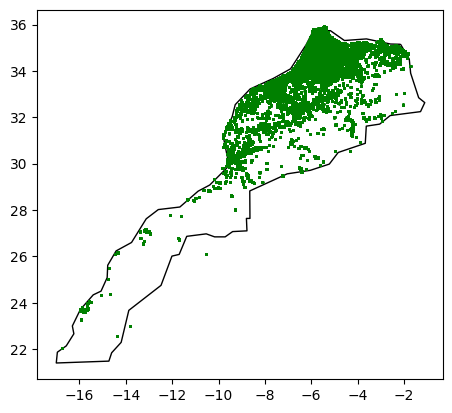

In [303]:
import matplotlib.pyplot as plt

# Create a GeoDataFrame from 'non_fire_df'
gdf_non_fire = gpd.GeoDataFrame(
    non_fire_df_sample, 
    geometry=gpd.points_from_xy(non_fire_df_sample.longitude, non_fire_df_sample.latitude)
)

# Plot the shape of Morocco
fig, ax = plt.subplots(1, 1)
morocco_shape.plot(ax=ax, color='white', edgecolor='black')

# Plot the locations from 'non_fire_df'
gdf_non_fire.plot(ax=ax, color='green', markersize=1)

plt.show()

## Merging Output

In [ ]:
wildfire_augmented_sample_df  #= wildfire_augmented_df.sample(n=2000000)

In [287]:
wild_fire_pred_output=wildfire_augmented_sample_df[['acq_date','latitude','longitude','station_name','is_fire']]
wild_fire_pred_output=pd.concat([wild_fire_pred_output,non_fire_df[['acq_date','latitude','longitude','station_name','is_fire']]]).reset_index(drop=True)

In [289]:
wild_fire_pred_output.to_parquet('Data/FinalDataSet/wild_fire_pred_output_4m_sample.parquet')

In [294]:
wild_fire_pred_output_shufled=wild_fire_pred_output.sample(frac=1).reset_index(drop=True)#.to_parquet('Data/FinalDataSet/wild_fire_pred_output_4m_sample_shuffled.parquet')

In [307]:
wild_fire_pred_output_shufled

,acq_date,latitude,longitude,station_name,is_fire
0,2017-10-26,35.747880,-5.760613,TANGER-PORT,1
1,2010-06-22,33.569122,-4.086332,TOUAHAR,0
2,2014-03-21,33.366963,-7.748232,MOHAMMED V,1
3,2019-07-31,33.874016,-3.984257,TAZA,1
4,2011-06-04,30.220467,-8.099778,TAROUDANT,0
...,...,...,...,...,...
3999995,2013-10-12,34.986119,-5.956477,OULAD EL RHOUMARI,1
3999996,2012-04-06,25.347785,-13.090688,SMARA,0
3999997,2020-08-26,35.244519,-5.544865,CHEFCHAOUEN,1
3999998,2015-01-18,34.592885,-2.345641,ANGADS,1


## Holiday Dataset

In [205]:
import pandas as pd
from datetime import datetime

# # Define a custom date parser
# date_parser = lambda x: datetime.strptime(x, '%Y %d %b')

# # Read the CSV file
holiday_df = pd.read_csv('Data/Holiday-Hist.txt', sep=';')

In [210]:
# Load the data
holiday_df = pd.read_csv('Data/Holiday-Hist.txt', sep=';')

# Dictionary mapping French month abbreviations to numerical values
month_dict = {
    'jan': '01',
    'fév': '02',
    'mar': '03',
    'avr': '04',
    'mai': '05',
    'juin': '06',
    'juil': '07',
    'aoû': '08',
    'sep': '09',
    'oct': '10',
    'nov': '11',
    'déc': '12'
}

# Replace French month abbreviations with numerical values
holiday_df['Date'] = holiday_df['Date'].replace(month_dict, regex=True)

# Now you can parse the dates
holiday_df['Date'] = pd.to_datetime(holiday_df['Date'], format='%Y %d %m')

In [305]:
holiday_df

,Date,DayOfWeek,Name,Type
0,2010-01-01,vendredi,New Year's Day,National holiday
1,2010-01-11,lundi,Anniversary of the Independence Manifesto,National holiday
2,2010-01-14,jeudi,Amazigh New Year,Observance
3,2010-02-26,vendredi,The Prophet Muhammad's Birthday,National holiday
4,2010-03-20,samedi,March Equinox,Season
...,...,...,...,...
340,2023-09-28,jeudi,The Prophet Muhammad's Birthday,National holiday
341,2023-09-29,vendredi,The Prophet Muhammad's Birthday Holiday,National holiday
342,2023-11-06,lundi,Anniversary of the Green March,National holiday
343,2023-11-18,samedi,Independence Day,National holiday


# Data Deep Meaning Extraction

### Date Meanings

In [314]:
# using holiday_df Date to generate is_holiday for the wild_fire_pred_output_shufled based on its acc_date column

# Convert 'Date' in 'holiday_df' to datetime and extract the date part
holiday_df['Date'] = pd.to_datetime(holiday_df['Date']).dt.date

# Convert 'acq_date' in 'wild_fire_pred_output_shuffled' to datetime and extract the date part
wild_fire_pred_output_shufled['acq_date'] = pd.to_datetime(wild_fire_pred_output_shufled['acq_date']).dt.date

# Generate 'is_holiday' column
wild_fire_pred_output_shufled['is_holiday'] = wild_fire_pred_output_shufled['acq_date'].isin(holiday_df['Date']).astype(int)

# use acc_date column in wild_fire_pred_output_shufled to generate day_of_week and day_of_year and is_weekend columns
# Convert 'acq_date' to datetime
wild_fire_pred_output_shufled['acq_date'] = pd.to_datetime(wild_fire_pred_output_shufled['acq_date'])

# Generate 'day_of_week' column (Monday=0, Sunday=6)
wild_fire_pred_output_shufled['day_of_week'] = wild_fire_pred_output_shufled['acq_date'].dt.dayofweek

# Generate 'day_of_year' column
wild_fire_pred_output_shufled['day_of_year'] = wild_fire_pred_output_shufled['acq_date'].dt.dayofyear

# Generate 'is_weekend' column
wild_fire_pred_output_shufled['is_weekend'] = wild_fire_pred_output_shufled['day_of_week'].isin([5, 6]).astype(int)

In [316]:
wild_fire_pred_output_shufled[wild_fire_pred_output_shufled['is_weekend']==1].is_fire.mean()

0.5051994972751761

In [318]:
wild_fire_pred_output_shufled.sort_values(by='acq_date',ascending=False)

,acq_date,latitude,longitude,station_name,is_fire,is_holiday,day_of_week,day_of_year,is_weekend
3062399,2022-12-30,24.167954,-14.988934,SMARA,0,0,4,364,0
2267315,2022-12-30,33.036476,-6.661232,KHOURIBGA,0,0,4,364,0
3115214,2022-12-30,30.409920,-8.429824,TAROUDANT,0,0,4,364,0
3329917,2022-12-30,24.412953,-14.379115,SMARA,0,0,4,364,0
3814449,2022-12-30,30.227502,-5.331759,ZAGORA,0,0,4,364,0
...,...,...,...,...,...,...,...,...,...
1137040,2010-01-01,26.411346,-12.395818,SMARA,0,1,4,1,0
1813026,2010-01-01,24.101761,-14.335930,SMARA,0,1,4,1,0
2499385,2010-01-01,22.133653,-14.886990,SMARA,0,1,4,1,0
3852117,2010-01-01,31.572987,-6.747352,OUARZAZATE,0,1,4,1,0


## NDVI matching

In [321]:
ndvi_dforg=ndvi_df.copy()
ndvi_df=ndvi_df.drop(columns=['Satellites','Percentile'])

In [324]:
from haversine import haversine

def find_nearest_ndvi(row):
    # Extract the year and month from 'acq_date'
    year = row['acq_date'].year
    month = row['acq_date'].month

    # Filter 'ndvi_df' to only include rows where the year and month match those of 'acq_date'
    ndvi_df_filtered = ndvi_df[(ndvi_df['Date'].dt.year == year) & (ndvi_df['Date'].dt.month == month)]

    # If 'ndvi_df_filtered' is empty, find the nearest date with coordinates
    if ndvi_df_filtered.empty:
        date_diffs = abs(ndvi_df['Date'] - row['acq_date'])
        nearest_date_index = date_diffs.idxmin()
        ndvi_df_filtered = ndvi_df.loc[[nearest_date_index]]

    coords_firm = row[['latitude', 'longitude']].values
    coords_ndvi_s = ndvi_df_filtered[['Latitude', 'Longitude']].values
    distances = [haversine(coords_firm, coord_ndvi) for coord_ndvi in coords_ndvi_s]
    nearest_ndvi_index = np.argmin(distances)
    return ndvi_df_filtered.iloc[nearest_ndvi_index]

In [ ]:
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
from haversine import haversine
import numpy as np

# Assuming ndvi_df and wild_fire_pred_output_shufled are already defined and loaded

def find_nearest_ndvi(row, ndvi_df):
    """
    Find the nearest NDVI data point for a given row of wildfire data.
    This function is designed to run in parallel.
    """
    # Extract latitude, longitude, and acquisition date from the row
    lat, lon, acq_date = row['latitude'], row['longitude'], row['acq_date']
    
    # Filter NDVI data for the relevant month and year
    ndvi_df_filtered = ndvi_df[(ndvi_df['Date'].dt.year == acq_date.year) &
                               (ndvi_df['Date'].dt.month == acq_date.month)]
    
    # If no exact match for month and year, find the closest date
    if ndvi_df_filtered.empty:
        ndvi_df['temp'] = abs(ndvi_df['Date'] - acq_date)
        ndvi_df_filtered = ndvi_df.loc[ndvi_df['temp'].idxmin()].to_frame().T
    
    # Compute distances to all NDVI points in the filtered DataFrame
    distances = ndvi_df_filtered.apply(lambda x: haversine((lat, lon), (x['Latitude'], x['Longitude'])), axis=1)
    
    # Find the index of the nearest NDVI point
    nearest_index = distances.idxmin()
    
    # Return the matched NDVI data
    return ndvi_df_filtered.loc[nearest_index]

def parallel_ndvi_matching(wildfire_df, ndvi_df):
    """
    Match NDVI data to wildfire data in parallel.
    """
    # Convert 'acq_date' to datetime format if it's not already
    wildfire_df['acq_date'] = pd.to_datetime(wildfire_df['acq_date'])
    
    # Prepare rows for parallel processing
    rows = [row for _, row in wildfire_df.iterrows()]
    
    # Use ProcessPoolExecutor to parallelize the operation
    with ProcessPoolExecutor() as executor:
        # Submit all rows for processing
        futures = [executor.submit(find_nearest_ndvi, row, ndvi_df) for row in rows]
        
        # Wait for all futures to complete and collect results
        results = [f.result() for f in futures]
    
    # Combine results into a single DataFrame
    matched_ndvi_df = pd.concat(results, axis=1).T.reset_index(drop=True)
    
    return matched_ndvi_df

# Example usage
# matched_ndvi_df = parallel_ndvi_matching(wild_fire_pred_output_shufled, ndvi_df)


In [325]:
wild_fire_pred_ndvi = wild_fire_pred_output_shufled.apply(find_nearest_ndvi, axis=1)